### 통신 고객 이탈 예측
- customer_id: 각 고객의 고유 식별자입니다.
- telecom_partner: 고객과 연결된 통신 파트너입니다.
- gender: 고객의 성별입니다.
- age: 고객의 나이입니다.
- state: 고객이 위치한 인도의 주입니다.
- city: 고객이 위치한 도시입니다.  
- pincode: 고객 위치의 핀코드입니다.  
- date_of_registration: 고객이 통신 파트너에 등록한 날짜입니다.
- num_dependents: 고객의 부양가족(예: 자녀) 수입니다.
- estimate_salary: 고객의 예상 급여입니다.
- call_made: 고객이 통화한 횟수입니다.
- sms_sent: 고객이 보낸 SMS 메시지 수입니다.
- data_used: 고객이 사용한 데이터의 양입니다.
#### 타겟
- churn: 고객이 이탈했는지 여부를 나타내는 이진 변수입니다(1 = 이탈, 0 = 이탈하지 않음).

In [1]:
import pandas as pd

t_df = pd.read_csv('./datasets/telecom_churn.csv')
t_df

,customer_id,telecom_partner,gender,age,state,city,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
0,1,Reliance Jio,F,25,Karnataka,Kolkata,755597,2020-01-01,4,124962,44,45,-361,0
1,2,Reliance Jio,F,55,Mizoram,Mumbai,125926,2020-01-01,2,130556,62,39,5973,0
2,3,Vodafone,F,57,Arunachal Pradesh,Delhi,423976,2020-01-01,0,148828,49,24,193,1
3,4,BSNL,M,46,Tamil Nadu,Kolkata,522841,2020-01-01,1,38722,80,25,9377,1
4,5,BSNL,F,26,Tripura,Delhi,740247,2020-01-01,2,55098,78,15,1393,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243548,243549,Airtel,F,28,Mizoram,Kolkata,110295,2023-05-03,3,130580,28,9,4102,0
243549,243550,Reliance Jio,F,52,Assam,Kolkata,713481,2023-05-03,0,82393,80,45,7521,0
243550,243551,Reliance Jio,M,59,Tripura,Kolkata,520218,2023-05-03,4,51298,26,4,6547,0
243551,243552,BSNL,M,49,Madhya Pradesh,Kolkata,387744,2023-05-03,2,83981,80,15,1125,0


In [2]:
t_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243553 entries, 0 to 243552
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   customer_id           243553 non-null  int64 
 1   telecom_partner       243553 non-null  object
 2   gender                243553 non-null  object
 3   age                   243553 non-null  int64 
 4   state                 243553 non-null  object
 5   city                  243553 non-null  object
 6   pincode               243553 non-null  int64 
 7   date_of_registration  243553 non-null  object
 8   num_dependents        243553 non-null  int64 
 9   estimated_salary      243553 non-null  int64 
 10  calls_made            243553 non-null  int64 
 11  sms_sent              243553 non-null  int64 
 12  data_used             243553 non-null  int64 
 13  churn                 243553 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 26.0+ MB


### 데이터 전처리

In [3]:
columns = ['customer_id', 'pincode', 'gender']
t_df.drop(labels=columns, axis=1, inplace=True)
t_df

,telecom_partner,age,state,city,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
0,Reliance Jio,25,Karnataka,Kolkata,2020-01-01,4,124962,44,45,-361,0
1,Reliance Jio,55,Mizoram,Mumbai,2020-01-01,2,130556,62,39,5973,0
2,Vodafone,57,Arunachal Pradesh,Delhi,2020-01-01,0,148828,49,24,193,1
3,BSNL,46,Tamil Nadu,Kolkata,2020-01-01,1,38722,80,25,9377,1
4,BSNL,26,Tripura,Delhi,2020-01-01,2,55098,78,15,1393,0
...,...,...,...,...,...,...,...,...,...,...,...
243548,Airtel,28,Mizoram,Kolkata,2023-05-03,3,130580,28,9,4102,0
243549,Reliance Jio,52,Assam,Kolkata,2023-05-03,0,82393,80,45,7521,0
243550,Reliance Jio,59,Tripura,Kolkata,2023-05-03,4,51298,26,4,6547,0
243551,BSNL,49,Madhya Pradesh,Kolkata,2023-05-03,2,83981,80,15,1125,0


In [4]:
t_df['date_of_registration'].astype

<bound method NDFrame.astype of 0         2020-01-01
1         2020-01-01
2         2020-01-01
3         2020-01-01
4         2020-01-01
             ...    
243548    2023-05-03
243549    2023-05-03
243550    2023-05-03
243551    2023-05-03
243552    2023-05-04
Name: date_of_registration, Length: 243553, dtype: object>

In [5]:
# 오늘 - 가입 날짜 -> 가입된 기간으로 변경
from datetime import datetime

# 오늘 날짜를 가져오기
today_date = datetime.today()
# 판다스의 Timestamp 객체로 변환
today = pd.Timestamp(today_date)

# 'date_of_registration' 열의 값을 판다스 Timestamp로 변환
t_df['date_of_registration'] = pd.to_datetime(t_df['date_of_registration'])

# 가입된 기간(일수)으로 변경
t_df['membership_duration'] = (today - t_df['date_of_registration']).dt.days

In [6]:
t_df.drop(labels=['date_of_registration'], axis=1, inplace=True)
t_df

,telecom_partner,age,state,city,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn,membership_duration
0,Reliance Jio,25,Karnataka,Kolkata,4,124962,44,45,-361,0,1570
1,Reliance Jio,55,Mizoram,Mumbai,2,130556,62,39,5973,0,1570
2,Vodafone,57,Arunachal Pradesh,Delhi,0,148828,49,24,193,1,1570
3,BSNL,46,Tamil Nadu,Kolkata,1,38722,80,25,9377,1,1570
4,BSNL,26,Tripura,Delhi,2,55098,78,15,1393,0,1570
...,...,...,...,...,...,...,...,...,...,...,...
243548,Airtel,28,Mizoram,Kolkata,3,130580,28,9,4102,0,352
243549,Reliance Jio,52,Assam,Kolkata,0,82393,80,45,7521,0,352
243550,Reliance Jio,59,Tripura,Kolkata,4,51298,26,4,6547,0,352
243551,BSNL,49,Madhya Pradesh,Kolkata,2,83981,80,15,1125,0,352


In [7]:
t_df.isna().sum()

telecom_partner        0
age                    0
state                  0
city                   0
num_dependents         0
estimated_salary       0
calls_made             0
sms_sent               0
data_used              0
churn                  0
membership_duration    0
dtype: int64

In [8]:
t_df.duplicated().sum()

0

In [9]:
t_df['telecom_partner'].value_counts()

telecom_partner
Reliance Jio    61123
Airtel          60905
Vodafone        60802
BSNL            60723
Name: count, dtype: int64

In [10]:
t_df['city'].value_counts()

city
Chennai      40749
Hyderabad    40698
Kolkata      40661
Bangalore    40603
Delhi        40456
Mumbai       40386
Name: count, dtype: int64

In [11]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

columns = ['telecom_partner', 'state', 'city']

encoders = {}

for column in columns:
    encoder = LabelEncoder()
    t_df[column] = encoder.fit_transform(t_df[column].tolist())
    encoders[column] = encoder
    print(f'{column}: {encoder.classes_}')

telecom_partner: ['Airtel' 'BSNL' 'Reliance Jio' 'Vodafone']
state: ['Andhra Pradesh' 'Arunachal Pradesh' 'Assam' 'Bihar' 'Chhattisgarh' 'Goa'
 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jharkhand' 'Karnataka' 'Kerala'
 'Madhya Pradesh' 'Maharashtra' 'Manipur' 'Meghalaya' 'Mizoram' 'Nagaland'
 'Odisha' 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana' 'Tripura'
 'Uttar Pradesh' 'Uttarakhand' 'West Bengal']
city: ['Bangalore' 'Chennai' 'Delhi' 'Hyderabad' 'Kolkata' 'Mumbai']


In [12]:
# churn 열을 맨 끝으로 이동
t_df = t_df[['telecom_partner', 'age', 'state', 'city',	'num_dependents', 'estimated_salary', 'calls_made', 'sms_sent', 'data_used', 'membership_duration', 'churn']]

In [13]:
t_df

,telecom_partner,age,state,city,num_dependents,estimated_salary,calls_made,sms_sent,data_used,membership_duration,churn
0,2,25,10,4,4,124962,44,45,-361,1570,0
1,2,55,16,5,2,130556,62,39,5973,1570,0
2,3,57,1,2,0,148828,49,24,193,1570,1
3,1,46,22,4,1,38722,80,25,9377,1570,1
4,1,26,24,2,2,55098,78,15,1393,1570,0
...,...,...,...,...,...,...,...,...,...,...,...
243548,0,28,16,4,3,130580,28,9,4102,352,0
243549,2,52,2,4,0,82393,80,45,7521,352,0
243550,2,59,24,4,4,51298,26,4,6547,352,0
243551,1,49,12,4,2,83981,80,15,1125,352,0


### 🆕 DTC

In [14]:
pre_t_df = t_df.copy()

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# DecisionTreeClassifier 모델 초기화
dtc = DecisionTreeClassifier()

# features와 targets 설정
features, targets = pre_t_df.iloc[:, :-1], pre_t_df.iloc[:, -1]

# train_test_split을 사용하여 데이터 분할
X_train, X_test, y_train, y_test =\
train_test_split(features, targets, test_size=0.2, random_state=124)

# 모델 훈련
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [16]:
from sklearn.tree import export_graphviz

export_graphviz(
    dtc, 
    out_file='./images/telecom_dtc01.dot', 
    class_names=encoder.classes_, 
    feature_names=features.columns, 
    impurity=True,
    filled=True
)

In [17]:
import graphviz

with open('./images/telecom_dtc01.dot') as f:
    telecom_dtc01 = f.read()

telecom_dtc01_graph = graphviz.Source(telecom_dtc01)

In [18]:
# telecom_dtc01_graph.render(filename="telecom_dtc01", directory="./images", format="png")

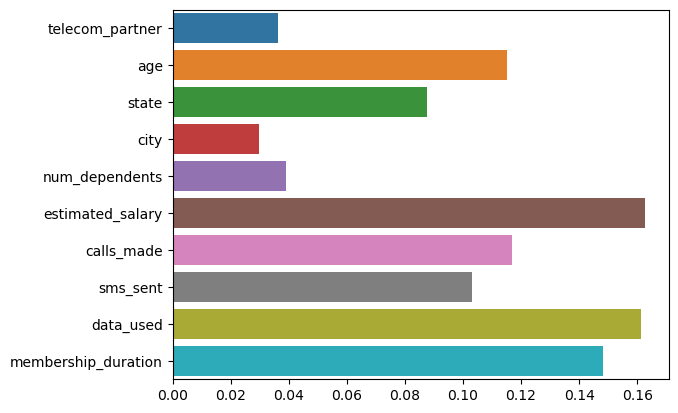

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x=dtc.feature_importances_, y=features.columns)
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


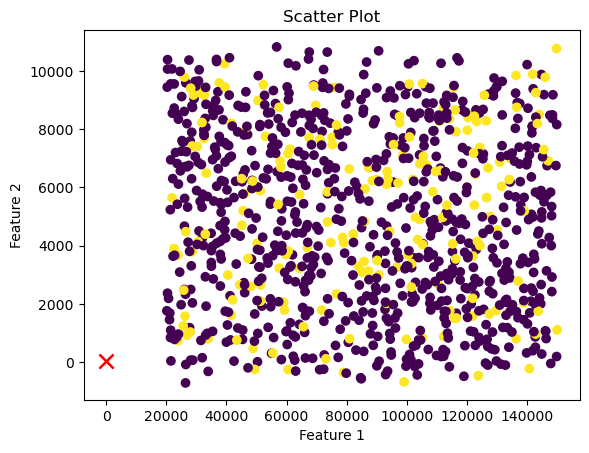

In [35]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# 데이터를 샘플링하여 일부만 시각화
sample_indices = np.random.choice(len(features), 1000, replace=False)  # 데이터에서 무작위로 1000개의 샘플 선택
sample_features = features.iloc[sample_indices]
sample_targets = targets[sample_indices]

# 시각화
plt.scatter(sample_features.iloc[:, 5], sample_features.iloc[:, 8], c=sample_targets)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot')

# 클러스터링 수행
kmeans = KMeans(n_clusters=3)
kmeans.fit(sample_features)
cluster_labels = kmeans.predict(sample_features)

# 클러스터 중심 시각화 (선택 사항)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='red', label='Centroids')

plt.show()

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Classifier의 Decision Boundary를 시각화하는 함수
def visualize_boundary(model, X, y):
    fig, ax = plt.subplots()
    
    # 데이터를 샘플링하여 일부만 시각화
    sample_indices = np.random.choice(len(X), 1000, replace=False)
    sample_X = X.iloc[sample_indices]
    sample_y = y[sample_indices]
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(sample_X.iloc[:, 0], sample_X.iloc[:, 1], c=sample_y, s=5, cmap='rainbow', edgecolor='k', clim=(sample_y.min(), sample_y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start, xlim_end = ax.get_xlim()
    ylim_start, ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 
    model.fit(sample_X.values, sample_y)
    
    # meshgrid 형태인 모든 좌표값으로 예측 수행 
    xx, yy = np.meshgrid(np.linspace(xlim_start, xlim_end, num=200), np.linspace(ylim_start, ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf()를 이용하여 class boundary를 visualization 수행 
    n_classes = len(np.unique(sample_y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(n_classes + 1) - 0.5, cmap='rainbow', zorder=1)
    
    plt.show()

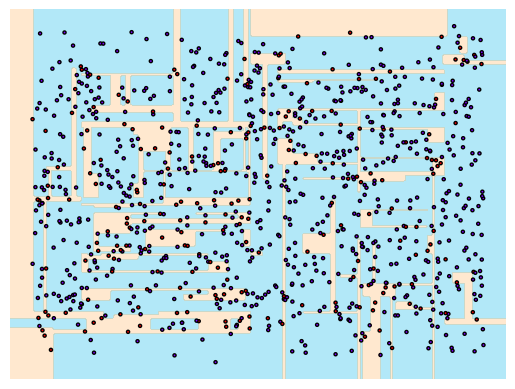

In [37]:
features_5_8 = features.iloc[:, [5, 8]] 
visualize_boundary(dtc, features_5_8, targets)

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# DecisionTreeClassifier 모델 초기화
dtc = DecisionTreeClassifier(min_samples_leaf=20)

# features와 targets 설정
features, targets = pre_t_df.iloc[:, :-1], pre_t_df.iloc[:, -1]

# train_test_split을 사용하여 데이터 분할
X_train, X_test, y_train, y_test =\
train_test_split(features, targets, test_size=0.2, random_state=124)

# 모델 훈련
dtc.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=20)

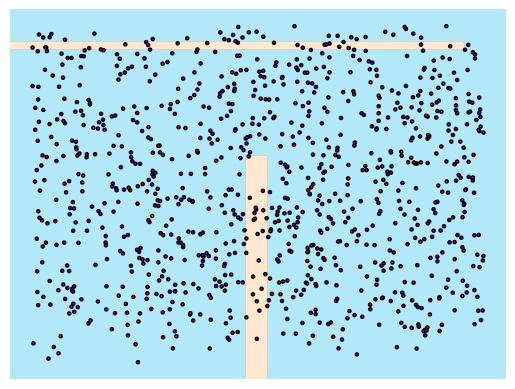

In [68]:
features_5_8 = features.iloc[:, [5, 8]] 
visualize_boundary(dtc, features_5_8, targets)

In [166]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier

features, targets = pre_t_df.iloc[:, :-1], pre_t_df.iloc[:, -1]

# stratify: 데이터 분리 시 타겟 데이터의 분포 비율에 맞춰서 나눠준다.
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, stratify=targets, random_state=124)

dtc = DecisionTreeClassifier()
parameters = {'max_depth': [15, 16, 17, 18], 'min_samples_split': [12, 13, 14]}

g_dtc = GridSearchCV(dtc, param_grid=parameters, cv=5, refit=True, return_train_score=True)

# 교차 검증 진행
g_dtc.fit(X_train, y_train)

pd.DataFrame(g_dtc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]

,params,mean_test_score,rank_test_score
0,"{'max_depth': 15, 'min_samples_split': 12}",0.790148,3
1,"{'max_depth': 15, 'min_samples_split': 13}",0.790309,1
2,"{'max_depth': 15, 'min_samples_split': 14}",0.790283,2
3,"{'max_depth': 16, 'min_samples_split': 12}",0.787563,6
4,"{'max_depth': 16, 'min_samples_split': 13}",0.787697,5
5,"{'max_depth': 16, 'min_samples_split': 14}",0.787879,4
6,"{'max_depth': 17, 'min_samples_split': 12}",0.784847,9
7,"{'max_depth': 17, 'min_samples_split': 13}",0.785169,8
8,"{'max_depth': 17, 'min_samples_split': 14}",0.785205,7
9,"{'max_depth': 18, 'min_samples_split': 12}",0.781303,12


In [167]:
from sklearn.metrics import accuracy_score

dtc = g_dtc.best_estimator_
prediction = dtc.predict(X_test)

print(f'정확도: {np.round(accuracy_score(y_test, prediction) * 100, 4)}%')

정확도: 78.8459%


In [168]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction)
#     재현율
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)
#     ROC-AUC
    roc_auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

오차 행렬
[[37856   715]
 [ 9491   184]]
정확도: 0.7885, 정밀도: 0.2047, 재현율: 0.0190, F1: 0.0348, ROC-AUC: 0.5002
################################################################################


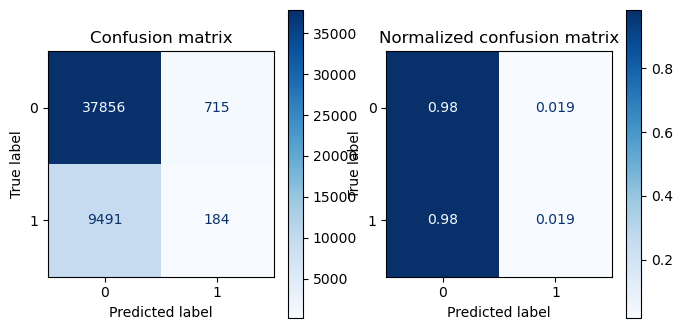

In [169]:
get_evaluation(y_test, prediction, dtc, X_test)

#### 1 Cycle
정밀도와 재현율 F1 Score가 너무 낮고, ROC-AUC가 0.5 인것으로보아 무작위에 가까운 성능을 보였다. 이상치를 제거하고 비중을 맞춰보고자 한다.

| 구분   | 정확도  | 정밀도  | 재현율  | F1 score | ROC-AUC |
|--------|---------|---------|---------|----------|----------|
| 1 Cycle| 0.7885  | 0.2047  | 0.0190  | 0.0348   | 0.5002   |

In [100]:
# 이상치 제거
features = std_pre_t_df.iloc[:, :-1]
for column in features.columns:
    std_pre_t_df.drop(
        std_pre_t_df[~std_pre_t_df[column].between(-1.96, 1.96)].index, 
        axis=0, 
        inplace=True)
    
for column in features.columns:
    print(f'{column}: {std_pre_t_df[~std_pre_t_df[column].between(-1.96, 1.96)].shape[0]}건')

telecom_partner: 0건
age: 0건
state: 0건
city: 0건
num_dependents: 0건
estimated_salary: 0건
calls_made: 0건
sms_sent: 0건
data_used: 0건
membership_duration: 0건


In [101]:
pre_t_df = pre_t_df.iloc[std_pre_t_df.index].reset_index(drop=True)
pre_t_df

,telecom_partner,age,state,city,num_dependents,estimated_salary,calls_made,sms_sent,data_used,membership_duration,churn
0,2,25,10,4,4,124962,44,45,-361,1570,0
1,2,55,16,5,2,130556,62,39,5973,1570,0
2,3,57,1,2,0,148828,49,24,193,1570,1
3,1,46,22,4,1,38722,80,25,9377,1570,1
4,1,26,24,2,2,55098,78,15,1393,1570,0
...,...,...,...,...,...,...,...,...,...,...,...
241225,0,28,16,4,3,130580,28,9,4102,352,0
241226,2,52,2,4,0,82393,80,45,7521,352,0
241227,2,59,24,4,4,51298,26,4,6547,352,0
241228,1,49,12,4,2,83981,80,15,1125,352,0


In [102]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# DecisionTreeClassifier 모델 초기화
dtc = DecisionTreeClassifier()

# features와 targets 설정
features, targets = pre_t_df.iloc[:, :-1], pre_t_df.iloc[:, -1]

# train_test_split을 사용하여 데이터 분할
X_train, X_test, y_train, y_test =\
train_test_split(features, targets, test_size=0.2, random_state=124)

# SMOTE를 사용하여 데이터 오버샘플링
smote = SMOTE(random_state=124)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

# 모델 훈련
dtc.fit(X_train_over, y_train_over)

DecisionTreeClassifier()

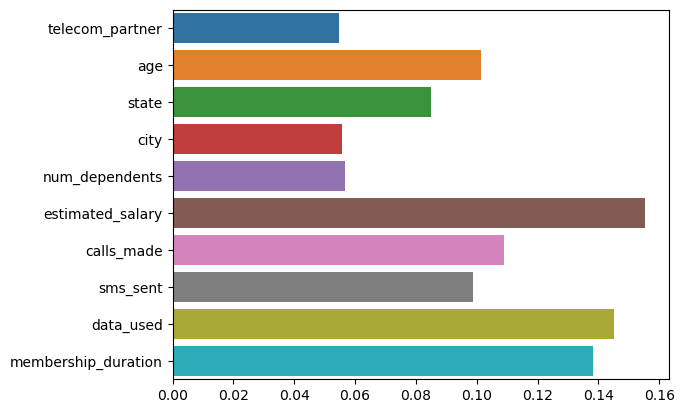

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x=dtc.feature_importances_, y=features.columns)
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


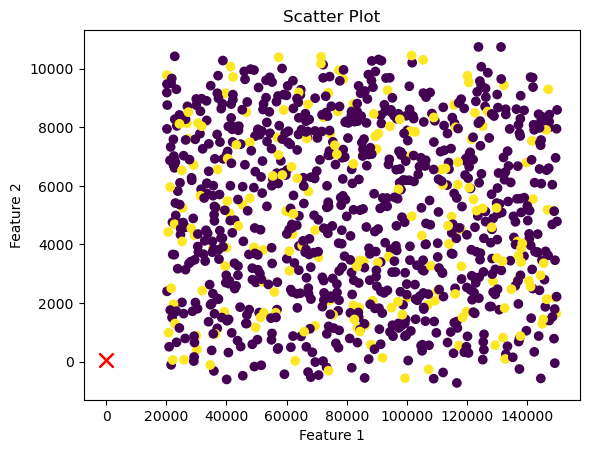

In [104]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# 데이터를 샘플링하여 일부만 시각화
sample_indices = np.random.choice(len(features), 1000, replace=False)  # 데이터에서 무작위로 1000개의 샘플 선택
sample_features = features.iloc[sample_indices]
sample_targets = targets[sample_indices]

# 시각화
plt.scatter(sample_features.iloc[:, 5], sample_features.iloc[:, 8], c=sample_targets)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot')

# 클러스터링 수행
kmeans = KMeans(n_clusters=3)
kmeans.fit(sample_features)
cluster_labels = kmeans.predict(sample_features)

# 클러스터 중심 시각화 (선택 사항)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='red', label='Centroids')

plt.show()

In [105]:
import numpy as np
import matplotlib.pyplot as plt

# Classifier의 Decision Boundary를 시각화하는 함수
def visualize_boundary(model, X, y):
    fig, ax = plt.subplots()
    
    # 데이터를 샘플링하여 일부만 시각화
    sample_indices = np.random.choice(len(X), 1000, replace=False)
    sample_X = X.iloc[sample_indices]
    sample_y = y[sample_indices]
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(sample_X.iloc[:, 0], sample_X.iloc[:, 1], c=sample_y, s=5, cmap='rainbow', edgecolor='k', clim=(sample_y.min(), sample_y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start, xlim_end = ax.get_xlim()
    ylim_start, ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 
    model.fit(sample_X.values, sample_y)
    
    # meshgrid 형태인 모든 좌표값으로 예측 수행 
    xx, yy = np.meshgrid(np.linspace(xlim_start, xlim_end, num=200), np.linspace(ylim_start, ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf()를 이용하여 class boundary를 visualization 수행 
    n_classes = len(np.unique(sample_y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(n_classes + 1) - 0.5, cmap='rainbow', zorder=1)
    
    plt.show()

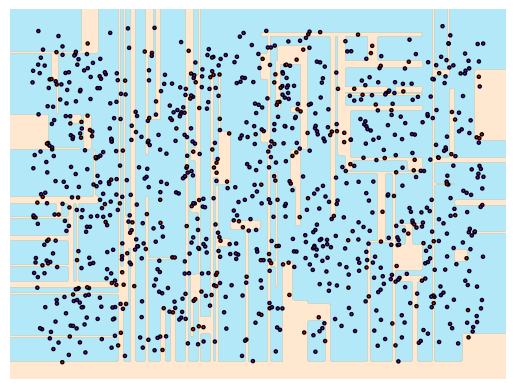

In [106]:
features_5_8 = features.iloc[:, [5, 8]] 
visualize_boundary(dtc, features_5_8, targets)

In [107]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# DecisionTreeClassifier 모델 초기화
dtc = DecisionTreeClassifier(min_samples_leaf=20)

# features와 targets 설정
features, targets = pre_t_df.iloc[:, :-1], pre_t_df.iloc[:, -1]

# train_test_split을 사용하여 데이터 분할
X_train, X_test, y_train, y_test =\
train_test_split(features, targets, test_size=0.2, random_state=124)

# SMOTE를 사용하여 데이터 오버샘플링
smote = SMOTE(random_state=124)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

# 모델 훈련
dtc.fit(X_train_over, y_train_over)

DecisionTreeClassifier(min_samples_leaf=20)

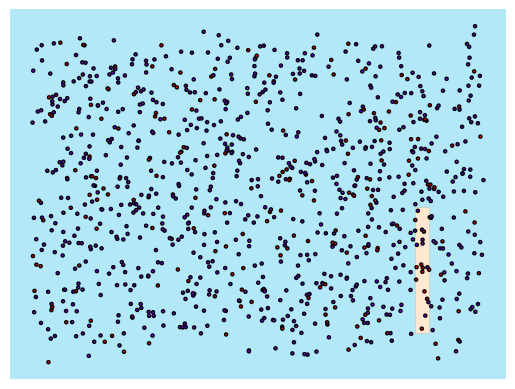

In [110]:
features_5_8 = features.iloc[:, [5, 8]] 
visualize_boundary(dtc, features_5_8, targets)

In [165]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier

features, targets = pre_t_df.iloc[:, :-1], pre_t_df.iloc[:, -1]

# stratify: 데이터 분리 시 타겟 데이터의 분포 비율에 맞춰서 나눠준다.
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, stratify=targets, random_state=124)

dtc = DecisionTreeClassifier()
parameters = {'max_depth': [15, 16, 17, 18], 'min_samples_split': [12, 13, 14]}

g_dtc = GridSearchCV(dtc, param_grid=parameters, cv=5, refit=True, return_train_score=True)

# 교차 검증 진행
g_dtc.fit(X_train, y_train)

pd.DataFrame(g_dtc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]

,params,mean_test_score,rank_test_score
0,"{'max_depth': 15, 'min_samples_split': 12}",0.790154,3
1,"{'max_depth': 15, 'min_samples_split': 13}",0.790314,2
2,"{'max_depth': 15, 'min_samples_split': 14}",0.790361,1
3,"{'max_depth': 16, 'min_samples_split': 12}",0.787557,6
4,"{'max_depth': 16, 'min_samples_split': 13}",0.787785,5
5,"{'max_depth': 16, 'min_samples_split': 14}",0.787801,4
6,"{'max_depth': 17, 'min_samples_split': 12}",0.784858,9
7,"{'max_depth': 17, 'min_samples_split': 13}",0.785107,8
8,"{'max_depth': 17, 'min_samples_split': 14}",0.785148,7
9,"{'max_depth': 18, 'min_samples_split': 12}",0.781215,12


In [170]:
from sklearn.metrics import accuracy_score

dtc = g_dtc.best_estimator_
prediction = dtc.predict(X_test)

print(f'정확도: {np.round(accuracy_score(y_test, prediction) * 100, 4)}%')

정확도: 78.8459%


In [171]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction)
#     재현율
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)
#     ROC-AUC
    roc_auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

오차 행렬
[[37856   715]
 [ 9491   184]]
정확도: 0.7885, 정밀도: 0.2047, 재현율: 0.0190, F1: 0.0348, ROC-AUC: 0.5002
################################################################################


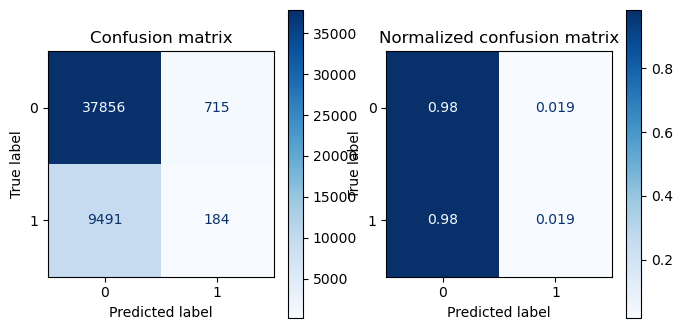

In [172]:
get_evaluation(y_test, prediction, dtc, X_test)

In [179]:
print(y_train.value_counts())
y_train_over.value_counts()

churn
0    154283
1     38701
Name: count, dtype: int64


churn
1    154408
0    154408
Name: count, dtype: int64

#### 2 Cycle
변화가 없다. 전체 스케일링을 진행해보고자 한다.

| 구분   | 정확도  | 정밀도  | 재현율  | F1 score | ROC-AUC |
|--------|---------|---------|---------|----------|----------|
| 1 Cycle| 0.7885  | 0.2047  | 0.0190  | 0.0348   | 0.5002   |
| 2 Cycle| 0.7885  | 0.2047  | 0.0190  | 0.0348   | 0.5002   |

In [181]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# StandardScaler를 사용하여 스케일링하는 파이프라인 구축
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # 피쳐들을 스케일링하는 스케일러
    ('dtc', DecisionTreeClassifier())  # 의사결정나무 분류기
])

# train_test_split을 사용하여 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=124)

# SMOTE를 사용하여 데이터 오버샘플링
smote = SMOTE(random_state=124)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

# 파이프라인으로 모델 훈련
pipeline.fit(X_train_over, y_train_over)

Pipeline(steps=[('scaler', StandardScaler()),
                ('dtc', DecisionTreeClassifier())])

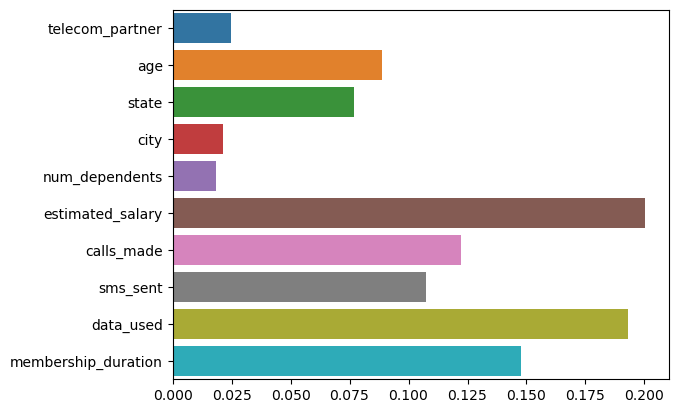

In [182]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x=dtc.feature_importances_, y=features.columns)
plt.show()

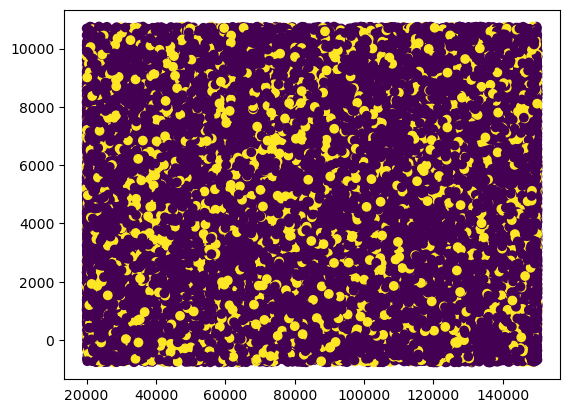

In [185]:
plt.scatter(features.iloc[:, 5], features.iloc[:, 8], c=targets)

In [214]:
import numpy as np
import matplotlib.pyplot as plt

# Classifier의 Decision Boundary를 시각화하는 함수
def visualize_boundary(model, X, y):
    fig, ax = plt.subplots()
    
    # 데이터를 샘플링하여 일부만 시각화
    sample_indices = np.random.choice(len(X), 1000, replace=False)
    sample_X = X.iloc[sample_indices]
    sample_y = y[sample_indices]
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(sample_X.iloc[:, 0], sample_X.iloc[:, 1], c=sample_y, s=5, cmap='rainbow', edgecolor='k', clim=(sample_y.min(), sample_y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start, xlim_end = ax.get_xlim()
    ylim_start, ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 
    model.fit(sample_X.values, sample_y)
    
    # meshgrid 형태인 모든 좌표값으로 예측 수행 
    xx, yy = np.meshgrid(np.linspace(xlim_start, xlim_end, num=200), np.linspace(ylim_start, ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf()를 이용하여 class boundary를 visualization 수행 
    n_classes = len(np.unique(sample_y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(n_classes + 1) - 0.5, cmap='rainbow', zorder=1)
    
    plt.show()

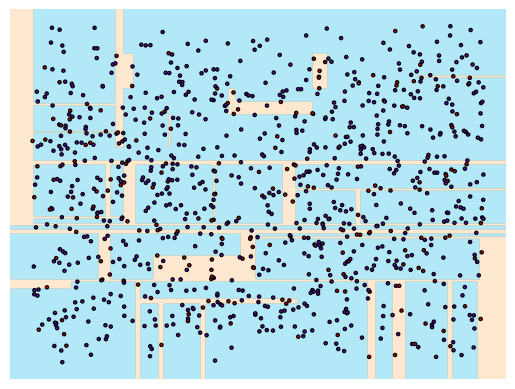

In [215]:
features_5_8 = features.iloc[:, [5, 8]] 
visualize_boundary(dtc, features_5_8, targets)

In [216]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# StandardScaler를 사용하여 스케일링하는 파이프라인 구축
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('dtc', DecisionTreeClassifier(min_samples_leaf=20)) 
])

# train_test_split을 사용하여 데이터 분할
# X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=124)

# SMOTE를 사용하여 데이터 오버샘플링
# smote = SMOTE(random_state=124)
# X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

# 파이프라인으로 모델 훈련
pipeline.fit(X_train_over, y_train_over)

Pipeline(steps=[('scaler', StandardScaler()),
                ('dtc', DecisionTreeClassifier(min_samples_leaf=20))])

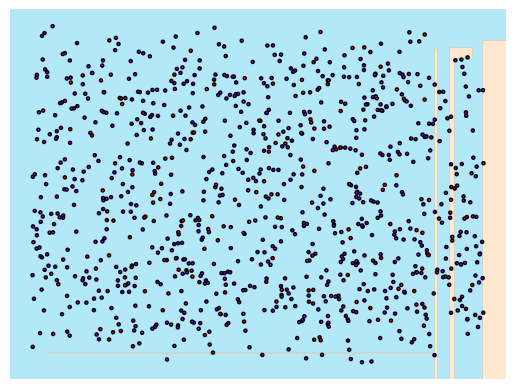

In [217]:
features_5_8 = features.iloc[:, [5, 8]] 
visualize_boundary(dtc, features_5_8, targets)

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier

# features, targets = pre_t_df.iloc[:, :-1], pre_t_df.iloc[:, -1]

# stratify: 데이터 분리 시 타겟 데이터의 분포 비율에 맞춰서 나눠준다.
# X_train, X_test, y_train, y_test = \
# train_test_split(features, targets, test_size=0.2, stratify=targets, random_state=124)

dtc = DecisionTreeClassifier()
parameters = {'max_depth': [15, 16, 17, 18], 'min_samples_split': [12, 13, 14]}

g_dtc = GridSearchCV(dtc, param_grid=parameters, cv=5, refit=True, return_train_score=True)

# 교차 검증 진행
g_dtc.fit(X_train, y_train)

pd.DataFrame(g_dtc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]

In [224]:
from sklearn.metrics import accuracy_score

dtc = g_dtc.best_estimator_
prediction = dtc.predict(X_test)

print(f'정확도: {np.round(accuracy_score(y_test, prediction) * 100, 4)}%')

정확도: 79.219%


In [225]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction)
#     재현율
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)
#     ROC-AUC
    roc_auc = roc_auc_score(y_test, prediction)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

오차 행렬
[[38143   428]
 [ 9598    77]]
정확도: 0.7922, 정밀도: 0.1525, 재현율: 0.0080, F1: 0.0151, ROC-AUC: 0.4984
################################################################################


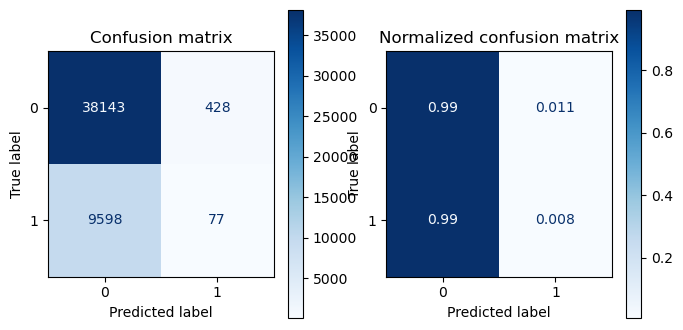

In [226]:
get_evaluation(y_test, prediction, dtc, X_test)

In [20]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std_pre_t_df= std.fit_transform(pre_t_df.iloc[:, :-1])

In [21]:
std_pre_t_df = pd.DataFrame(std_pre_t_df, columns=pre_t_df.iloc[:, :-1].columns)
std_pre_t_df['churn'] = pre_t_df.churn
std_pre_t_df

,telecom_partner,age,state,city,num_dependents,estimated_salary,calls_made,sms_sent,data_used,membership_duration,churn
0,0.447149,-1.281782,-0.434607,0.880088,1.415256,1.064837,-0.170117,1.429025,-1.819905,1.730623,0
1,0.447149,0.542593,0.308825,1.465926,0.001767,1.213975,0.441016,1.021791,0.333042,1.730623,0
2,1.341780,0.664218,-1.549754,-0.291588,-1.411722,1.701113,-0.000358,0.003706,-1.631599,1.730623,1
3,-0.447483,-0.004720,1.052257,0.880088,-0.704977,-1.234351,1.052149,0.071578,1.490073,1.730623,1
4,-0.447483,-1.220969,1.300067,-0.291588,0.001767,-0.797761,0.984245,-0.607145,-1.223715,1.730623,0
...,...,...,...,...,...,...,...,...,...,...,...
243548,-1.342114,-1.099344,0.308825,0.880088,0.708512,1.214615,-0.713346,-1.014379,-0.302917,-1.730623,0
243549,0.447149,0.360155,-1.425849,0.880088,-1.411722,-0.070067,1.052149,1.429025,0.859212,-1.730623,0
243550,0.447149,0.785842,1.300067,0.880088,1.415256,-0.899071,-0.781250,-1.353741,0.528146,-1.730623,0
243551,-0.447483,0.177718,-0.186796,0.880088,0.001767,-0.027730,1.052149,-0.607145,-1.314809,-1.730623,0
